In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regression related stuffs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Multicollinearity measure
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing the dataset
- Converting p and r from seconds to hours
- Create all predictors
- Split the dataset into train and test subsets

In [3]:
# Read and merge score-dist-1.csv and score-dist-2.csv
columns = ['p', 'q', 'r', 'score']
dist1 = pd.read_csv("DATA/score-distribution-1.csv", names=columns)
dist2 = pd.read_csv("DATA/score-distribution-2.csv", names=columns)

dist = pd.concat([dist1, dist2], ignore_index=True)
dist.head()

,p,q,r,score
0,10.0,4.0,27541.0,0.026960
1,11.0,2.0,27614.0,0.036098
2,8196.0,8.0,27804.0,0.040375
3,9272.0,1.0,27834.0,0.039768
4,24297.0,78.0,27840.0,0.039782


In [4]:
# Time conversion (seconds to hours)
for column in ['p', 'r']:
    dist[column] = dist[column] / 3600 # seconds in one hour
dist.head()

,p,q,r,score
0,0.002778,4.0,7.650278,0.026960
1,0.003056,2.0,7.670556,0.036098
2,2.276667,8.0,7.723333,0.040375
3,2.575556,1.0,7.731667,0.039768
4,6.749167,78.0,7.733333,0.039782


In [5]:
# Separate features from target
features = dist[["p", "q", "r"]].copy()
target = dist["score"].copy()

In [6]:
# Quadratic terms
features[['p2', 'q2', 'r2']] = features[['p', 'q', 'r']]**2
features['pq'] = features['p']*features['q']
features.head()

,p,q,r,p2,q2,r2,pq
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000


In [7]:
# Cubic terms
features[['p3', 'q3', 'r3']] = features[['p', 'q', 'r']]**3
features['p2q'] = features['p']**2 * features['q']
features['pq2'] = features['p'] * features['q']**2
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,p2q,pq2
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,0.000031,0.044444
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,0.000019,0.012222
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,41.465689,145.706667
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,6.633486,2.575556
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,3552.997554,41061.930000


In [8]:
# Quartic terms
features[['p4', 'q4', 'r4']] = features[['p', 'q', 'r']]**4
features['p3q'] = features['p']**3 * features['q']
features['p2q2'] = features['p']**2 * features['q']**2
features['pq3'] = features['p'] * features['q']**3
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,p2q,pq2,p4,q4,r4,p3q,p2q2,pq3
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,0.000031,0.044444,5.953742e-11,256.0,3425.380475,8.573388e-08,0.000123,1.777778e-01
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,0.000019,0.012222,8.716873e-11,16.0,3461.842290,5.705590e-08,0.000037,2.444444e-02
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,41.465689,145.706667,2.686568e+01,4096.0,3558.107919,9.440355e+01,331.725511,1.165653e+03
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,6.633486,2.575556,4.400314e+01,1.0,3573.489321,1.708491e+01,6.633486,2.575556e+00
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,3552.997554,41061.930000,2.074916e+03,37015056.0,3576.571575,2.397977e+04,277133.809225,3.202831e+06


In [9]:
# Quintic terms
features[['p5', 'q5', 'r5']] = features[['p', 'q', 'r']]**5
features['p4q'] = features['p']**4 * features['q']
features['p3q2'] = features['p']**3 * features['q']**2
features['p2q3'] = features['p']**2 * features['q']**3
features['pq4'] = features['p'] * features['q']**4
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,...,p3q,p2q2,pq3,p5,q5,r5,p4q,p3q2,p2q3,pq4
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,...,8.573388e-08,0.000123,1.777778e-01,1.653817e-13,1.024000e+03,26205.112125,2.381497e-10,3.429355e-07,4.938272e-04,7.111111e-01
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,...,5.705590e-08,0.000037,2.444444e-02,2.663489e-13,3.200000e+01,26554.253611,1.743375e-10,1.141118e-07,7.469136e-05,4.888889e-02
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,...,9.440355e+01,331.725511,1.165653e+03,6.116419e+01,3.276800e+04,27480.453494,2.149254e+02,7.552284e+02,2.653804e+03,9.325227e+03
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,...,1.708491e+01,6.633486,2.575556e+00,1.133325e+02,1.000000e+00,27629.028263,4.400314e+01,1.708491e+01,6.633486e+00,2.575556e+00
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,...,2.397977e+04,277133.809225,3.202831e+06,1.400396e+04,2.887174e+09,27658.820182,1.618435e+05,1.870422e+06,2.161644e+07,2.498208e+08


In [10]:
# Sextic terms
features[['p6', 'q6', 'r6']] = features[['p', 'q', 'r']]**6
features['p5q'] = features['p']**5 * features['q']
features['p4q2'] = features['p']**4 * features['q']**2
features['p3q3'] = features['p']**3 * features['q']**3
features['p2q4'] = features['p']**2 * features['q']**4
features['pq5'] = features['p'] * features['q']**5
features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,...,p2q3,pq4,p6,q6,r6,p5q,p4q2,p3q3,p2q4,pq5
0,0.002778,4.0,7.650278,0.000008,16.0,58.526750,0.011111,2.143347e-08,64.0,447.745896,...,4.938272e-04,7.111111e-01,4.593937e-16,4.096000e+03,200476.386956,6.615269e-13,9.525987e-10,1.371742e-06,1.975309e-03,2.844444e+00
1,0.003056,2.0,7.670556,0.000009,4.0,58.837423,0.006111,2.852795e-08,8.0,451.315718,...,7.469136e-05,4.888889e-02,8.138439e-16,6.400000e+01,203685.877556,5.326978e-13,3.486749e-10,2.282236e-07,1.493827e-04,9.777778e-02
2,2.276667,8.0,7.723333,5.183211,64.0,59.649878,18.213333,1.180044e+01,512.0,460.695889,...,2.653804e+03,9.325227e+03,1.392505e+02,2.621440e+05,212240.702483,4.893135e+02,1.719403e+03,6.041827e+03,2.123043e+04,7.460181e+04
3,2.575556,1.0,7.731667,6.633486,1.0,59.778669,2.575556,1.708491e+01,1.0,462.188746,...,6.633486e+00,2.575556e+00,2.918942e+02,1.000000e+00,213618.436856,1.133325e+02,4.400314e+01,1.708491e+01,6.633486e+00,2.575556e+00
4,6.749167,78.0,7.733333,45.551251,6084.0,59.804444,526.435000,3.074330e+02,474552.0,462.487704,...,2.161644e+07,2.498208e+08,9.451504e+04,2.251996e+11,213894.876077,1.092309e+06,1.262379e+07,1.458929e+08,1.686082e+09,1.948602e+10


In [11]:
training_features, test_features, training_targets, test_targets = \
    train_test_split(features, target, test_size=0.2, random_state=42)
training_features.head()

,p,q,r,p2,q2,r2,pq,p3,q3,r3,...,p2q3,pq4,p6,q6,r6,p5q,p4q2,p3q3,p2q4,pq5
7525,2.306389,1.0,2.652778,5.319430,1.0,7.037230,2.306389,1.226867e+01,1.0,18.668207,...,5.319430,2.306389,1.505204e+02,1.000000e+00,3.485020e+02,6.526235e+01,2.829633e+01,12.268674,5.319430,2.306389
4436,0.022778,16.0,6.095833,0.000519,256.0,37.159184,0.364444,1.181773e-05,4096.0,226.516193,...,2.125116,1492.764444,1.396587e-10,1.677722e+07,5.130959e+04,9.810175e-08,6.891050e-05,0.048405,34.001857,23884.231111
10113,0.002222,32.0,0.828889,0.000005,1024.0,0.687057,0.071111,1.097394e-08,32768.0,0.569494,...,0.161817,2330.168889,1.204273e-16,1.073742e+09,3.243231e-01,1.734153e-12,2.497180e-08,0.000360,5.178153,74565.404444
7628,0.032778,1.0,2.151944,0.001074,1.0,4.630865,0.032778,3.521588e-05,1.0,9.965364,...,0.001074,0.032778,1.240158e-09,1.000000e+00,9.930848e+01,3.783533e-08,1.154298e-06,0.000035,0.001074,0.032778
8059,0.100000,1.0,10.185000,0.010000,1.0,103.734225,0.100000,1.000000e-03,1.0,1056.533082,...,0.010000,0.100000,1.000000e-06,1.000000e+00,1.116262e+06,1.000000e-05,1.000000e-04,0.001000,0.010000,0.100000


# Multiple Linear Regression

## Facilities

In [12]:
def run_regression(X, X_test, y, y_test):
    # Compute the sample weights: w = p*q
    # provides good estimations for large jobs
    w = (X['p'] * X['q'])

    # Model fit
    lreg = LinearRegression()
    lreg.fit(X, y, sample_weight=w)

    print(f"Intercept: {lreg.intercept_}\nCoeficients: {lreg.coef_}")
    
    # Predictions in test set
    y_predict = lreg.predict(X_test)

    # Prediction errors
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)

    print(f"Mean Absolute Error: {mae}\nMean Squared Error: {mse}")

In [13]:
def correlation(X, flabel):
    # set figure size
    plt.figure(figsize=(10,7))

    # Generate a mask to onlyshow the bottom triangle
    mask = np.triu(np.ones_like(X.corr(), dtype=bool))

    # generate heatmap
    sns.heatmap(X.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
    plt.title('Correlation Coefficient Of Predictors for ' + flabel)
    plt.show()

In [14]:
def vif(X):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['feature'] = X.columns
    print(vif)

## Linear function regression

In [18]:
lin_features = ['p', 'q', 'r']
X_lin_train = training_features[lin_features]
X_lin_test = test_features[lin_features]

run_regression(X_lin_train, X_lin_test, training_targets, test_targets)

Intercept: 0.032247578568287236
Coeficients: [ 5.24248737e-04  1.61682411e-05 -4.25473461e-04]
Mean Absolute Error: 0.004231719071156759
Mean Squared Error: 2.7985211329416176e-05


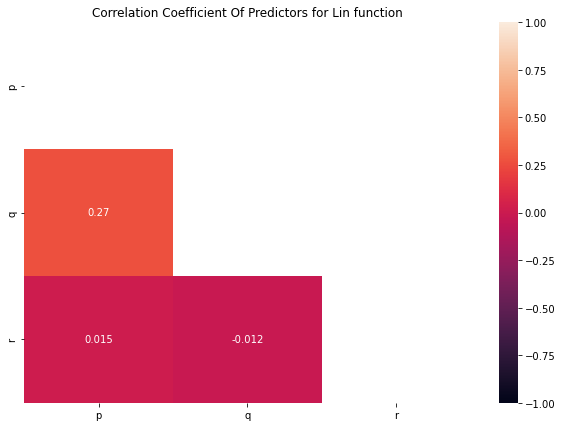

In [19]:
correlation(X_lin_train, "Lin function")

In [20]:
vif(X_lin_train)

        VIF feature
0  1.322925       p
1  1.271269       q
2  1.196897       r
